### Exercise 2 : CLUSTERING
2.	Using the Mall Customers dataset, apply Hierarchical Clustering. Plot the dendrogram to understand how the points are merged into clusters. Determine the number of clusters using the dendrogram's threshold.

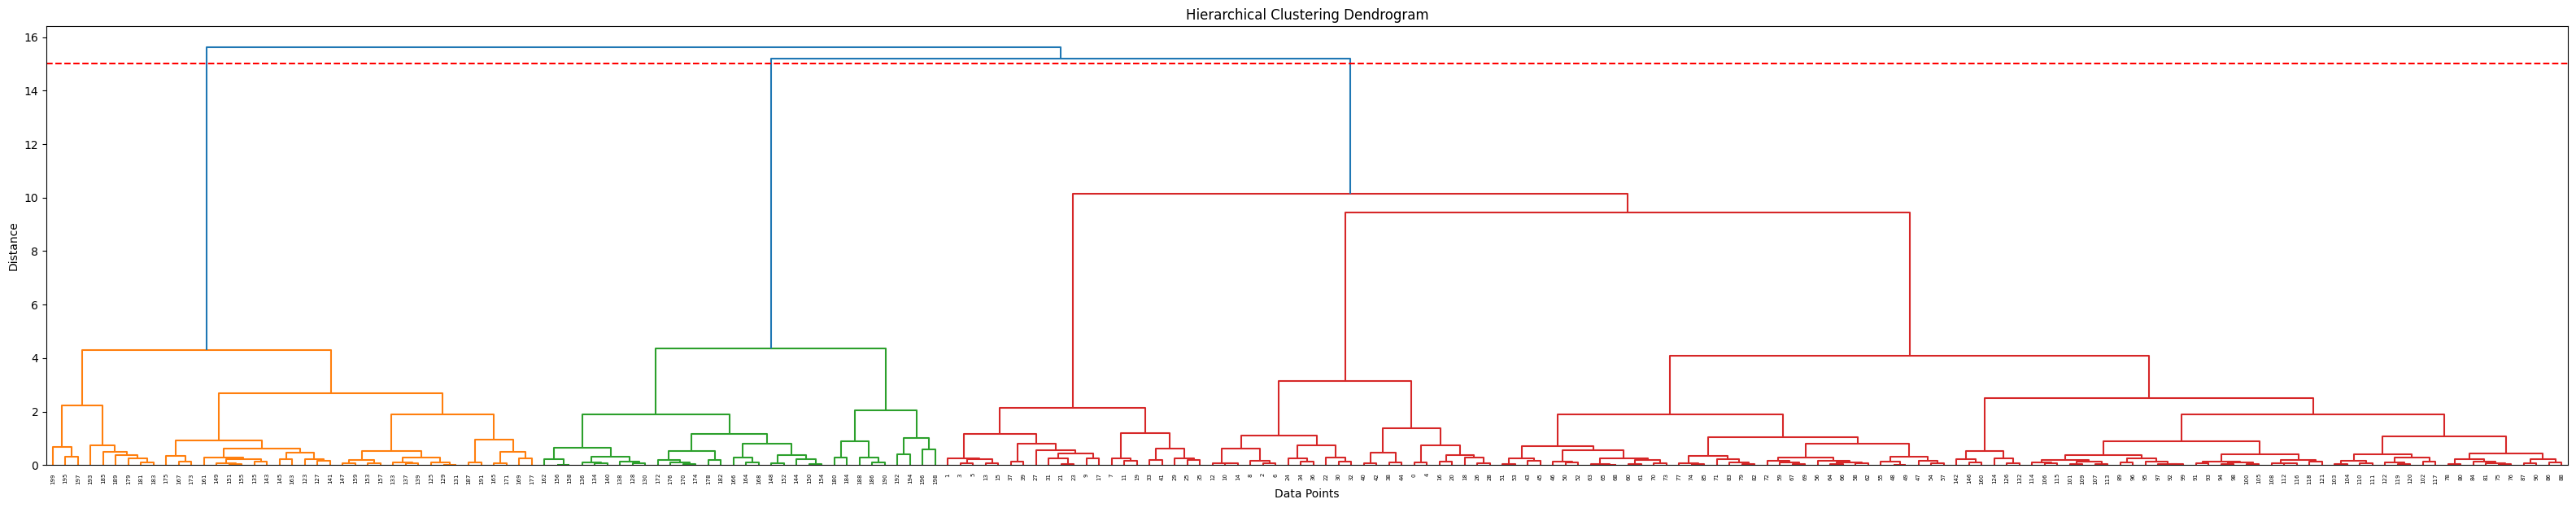

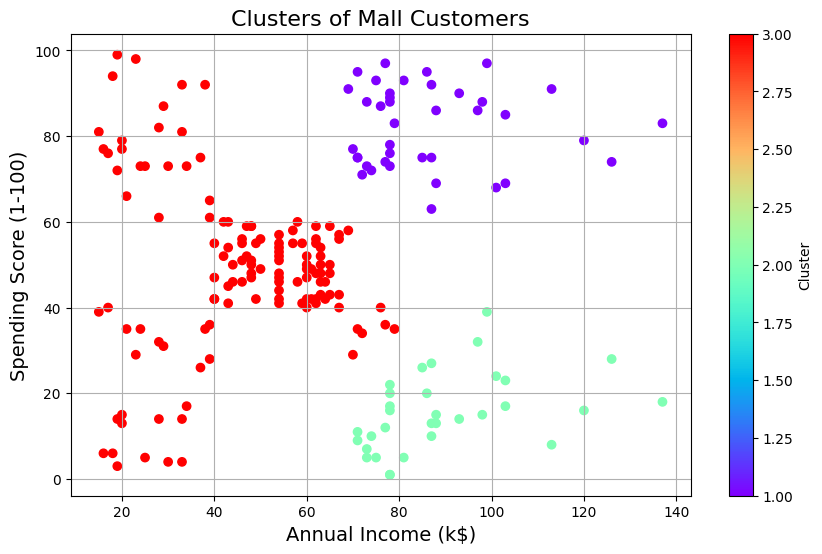

Silhouette Score: 0.461
Cluster
3    129
1     39
2     32
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


data = pd.read_csv('Mall_Customers.csv')


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='ward')


dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.axhline(y=15, color='r', linestyle='--', label='Threshold (y=15)')
plt.show()



threshold = 15  


clusters = fcluster(linked, threshold, criterion='distance')



plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='rainbow')
plt.title('Clusters of Mall Customers', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')


print(data['Cluster'].value_counts())

